In [ ]:
!pip install seaborn
!pip install matplotlib


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt


*Read csv file from url*

In [4]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/teachingratings.csv'
df = pd.read_csv(url)

In [10]:
df.describe()

,age,beauty,eval,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
count,463.000000,4.630000e+02,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000
mean,48.365011,6.271140e-08,3.998272,36.624190,55.177106,45.434125,0.203024,0.138229,0.421166,0.058315,0.660907,0.939525,0.779698
std,9.802742,7.886477e-01,0.554866,45.018481,75.072800,27.508902,0.402685,0.345513,0.494280,0.234592,0.473913,0.238623,0.414899
min,29.000000,-1.450494e+00,2.100000,5.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,-6.562689e-01,3.600000,15.000000,19.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,48.000000,-6.801430e-02,4.000000,23.000000,29.000000,44.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,57.000000,5.456024e-01,4.400000,40.000000,60.000000,70.500000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,73.000000,1.970023e+00,5.000000,380.000000,581.000000,94.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


*Finding unique case for prof variable*

In [5]:
df.prof.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55,
       56, 57, 58, 59, 60, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 75,
       76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92,
       93, 94, 22, 30, 40, 47, 61, 62, 69])

*Find out number of unique values*

In [6]:
df.prof.nunique()

94

*To find mean and sd for age variable*

In [8]:
df['age'].mean()

48.365010799136066

In [9]:
df['age'].std()

9.80274203786482

*Filtering the data set to include one observation for each instructor with a total number of observations restricted to 94
First, remove duplicate using prof as a subset and assign it to a new df*


In [11]:
new_df = df.drop_duplicates(subset=['prof'])
new_df.head()

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1
7,no,51,male,more,-0.571984,3.7,upper,yes,yes,55,55,3,0,0,0,0,1,1,1
9,no,40,female,more,-0.677963,4.3,upper,yes,yes,40,46,4,0,0,1,0,1,1,1
17,no,31,female,more,1.509794,4.4,upper,yes,yes,42,48,5,0,0,1,0,1,1,1


*updated mean and sd*

In [12]:
new_df['age'].mean()

47.5531914893617

In [13]:
new_df['age'].std()

10.25651329515495

<h4>Usinga bar chart to demostrate if instructor teaching lower-divison courses receieve higher average evaluation<h4>

*First, find average of upper and lower division*

In [15]:
division_mean = df.groupby('division')['eval'].mean().reset_index()

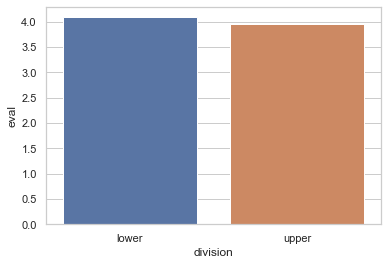

In [16]:
sns.set(style='whitegrid')
ax = sns.barplot(x='division', y='eval', data=division_mean)

---
<h4>Plot relationship between age and teaching eval scores with scatter plot<h4>

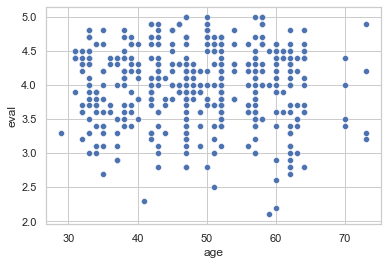

In [19]:
ax = sns.scatterplot(x='age', y='eval', data=df)

<h4>Adding hue argument to the scatter plot<h4>

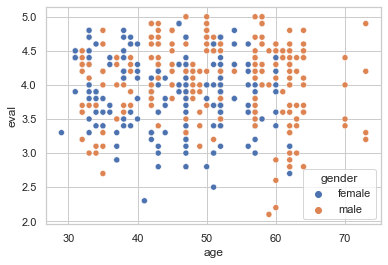

In [21]:
ax = sns.scatterplot(x='age', y='eval', hue='gender',data=df)

<h4>Using box plot for beauty scores differentiated by credits<h4>

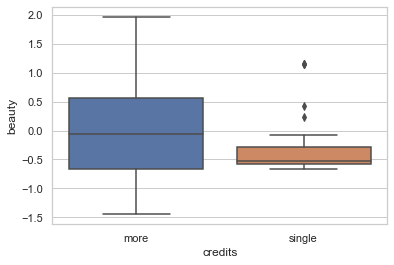

In [25]:
ax = sns.boxplot(x='credits', y='beauty', data=df)

<h4>Using cat plot from seaborn library<h4>

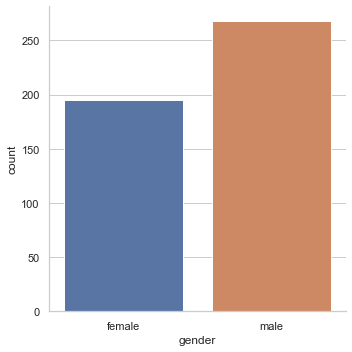

In [26]:
sns.catplot(x='gender', kind='count', data=df)

<h4>Making sense to the plot by adding hue<h4>

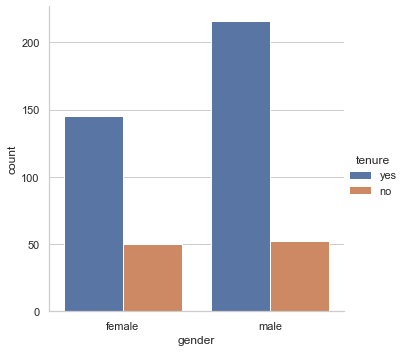

In [28]:
sns.catplot(x='gender', hue='tenure',kind='count', data=df)

<h4>Adding a division factor using row<h4>

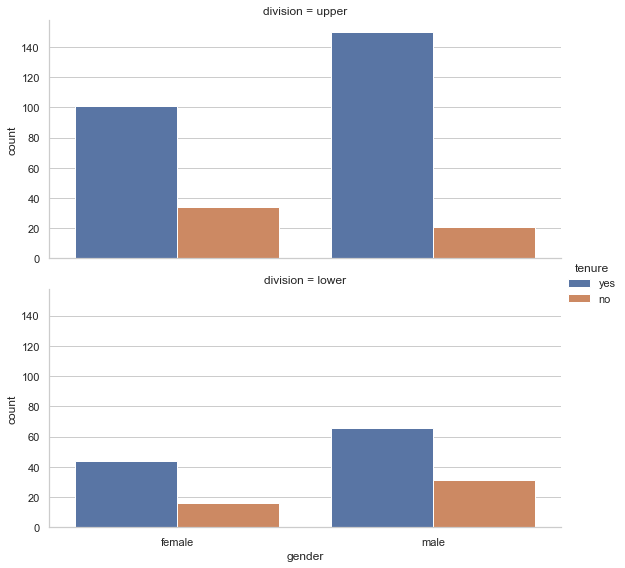

In [30]:
sns.catplot(x='gender', hue='tenure',row='division', kind='count', data=df, height=4, aspect=2)

<h4>A distribution plot showing teaching eval scores<h4>

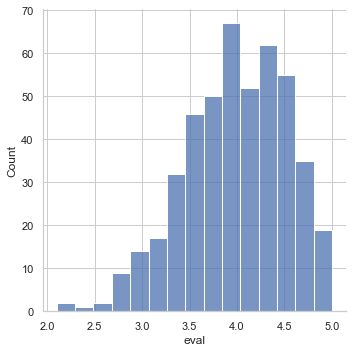

In [35]:
ax = sns.displot(df['eval'], kde=False)

<h4>A displot same as above, adding gender as a factor<h4>

/Users/brandontan/anaconda3/envs/myenv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='eval'>

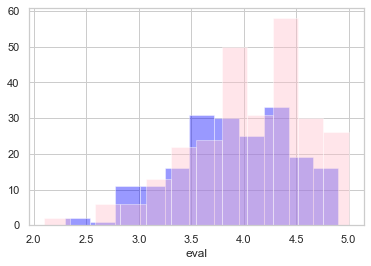

In [39]:
sns.distplot(df[df['gender'] == 'female']['eval'], color='blue', kde=False)
sns.distplot(df[df['gender'] == 'male']['eval'], color='pink', kde=False)
